# Project 5 : iphone purchasing :

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('E:\iphone_purchase_records.csv')
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
df1=data.copy()
df1.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
df1.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [8]:
print('No. of columns', df1.shape[1])

No. of columns 4


In [9]:
print('No. of rows', df1.shape[0])

No. of rows 400


In [11]:
gen=df1['Gender'].value_counts()
print('Gender distribution',gen)

Gender distribution Gender
Female    204
Male      196
Name: count, dtype: int64


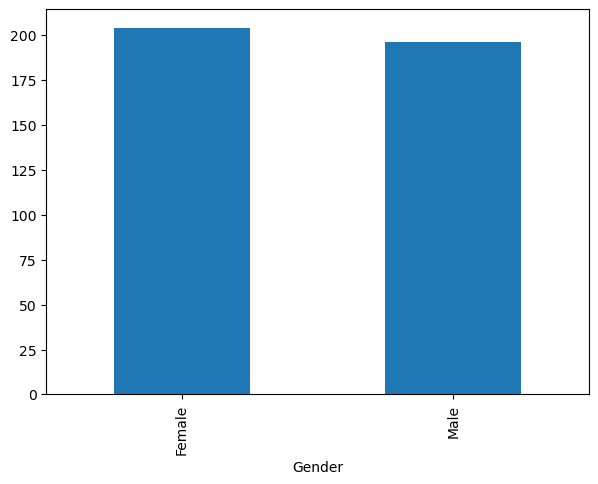

In [13]:
# Total male & females -
plt.figure(figsize=(7,5))
df1['Gender'].value_counts().plot(kind='bar')
plt.show()

In [16]:
# number of male & female having iphone - 
male_i = len(df1[(df1['Gender']=='Male')&(df1['Purchase Iphone']==1)])
print('Total number of male have iphone', male_i)
female_i = len(df1[(df1['Gender']=='Female')&(df1['Purchase Iphone']==1)])
print('Total number of male have iphone', female_i)

Total number of male have iphone 66
Total number of male have iphone 77


In [17]:
#Genderwise Max Salary -
df1.groupby('Gender')['Salary'].min()

Gender
Female    15000
Male      15000
Name: Salary, dtype: int64

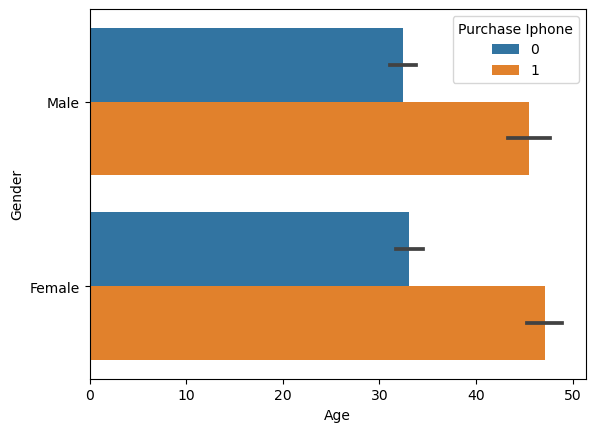

In [19]:
#iphone holders - 
sns.barplot(x='Age', y='Gender', hue='Purchase Iphone',data=df1)
plt.show()

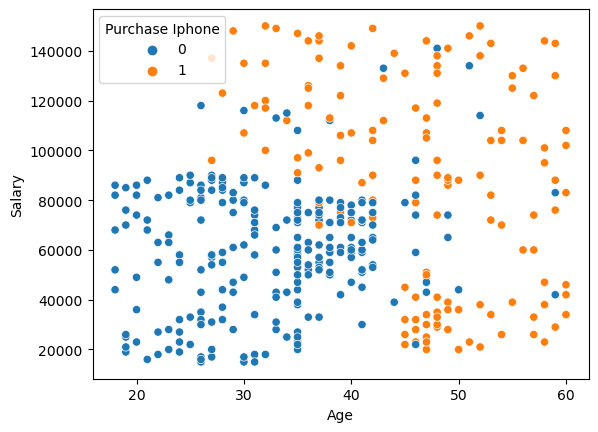

In [27]:
#total number of iphone users by age 
sns.scatterplot(x='Age', y='Salary', hue='Purchase Iphone', data=df1)
plt.show()

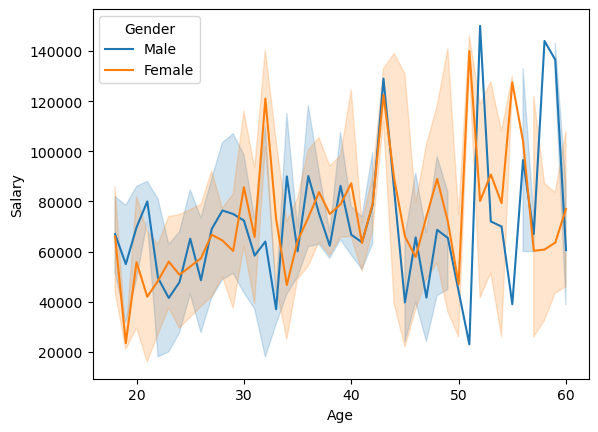

In [31]:
# Age and salary distribution by gender
sns.lineplot(x='Age', y='Salary',hue='Gender', data=df1)
plt.show()

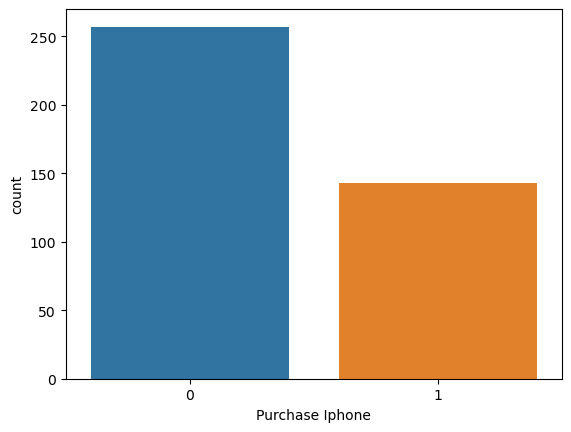

In [39]:
sns.countplot(x='Purchase Iphone',data=df1)
plt.show()

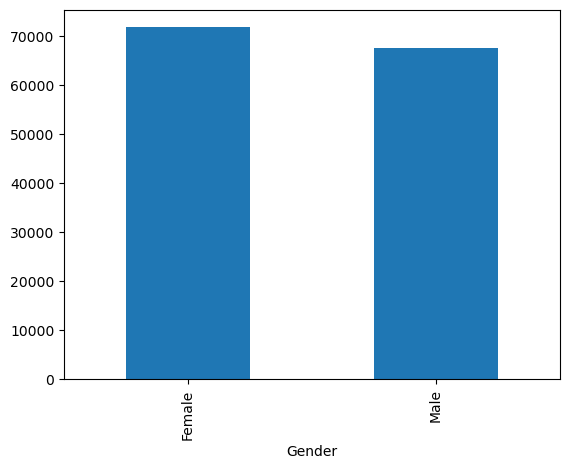

In [40]:
#Average salary by gender  
df1.groupby('Gender')['Salary'].mean().plot(kind='bar')
plt.show()

In [41]:
round(df1.groupby('Gender')['Salary'].mean())

Gender
Female    71760.0
Male      67643.0
Name: Salary, dtype: float64

In [6]:
df1.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [8]:
#KNN model 
dummy = pd.get_dummies(df1['Gender']).astype('int')
dummy

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [9]:
df2 = pd.concat([df1,dummy], axis=1)
df2.head()

,Gender,Age,Salary,Purchase Iphone,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1


In [10]:
X= df2[['Female','Male','Age','Salary']]
y=df2['Purchase Iphone']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# K identification 
from math import sqrt
sqrt(df2.shape[0])

20.0

In [15]:
clf= KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
pred = clf.predict(X_test)
pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [17]:
#for checking accuracy of the model - 
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
print('Accuracy level = ',accuracy_score(y_test,pred)*100)

Accuracy level =  83.75


In [19]:
confusion_matrix(y_test, pred)

array([[51,  4],
       [ 9, 16]], dtype=int64)

<Axes: >

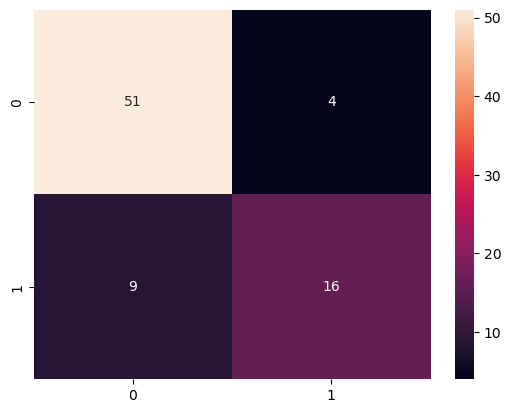

In [20]:
sns.heatmap(confusion_matrix(y_test, pred), annot =True)

In [21]:
error = []

In [22]:
for i in range(1,20):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i = clf.predict(X_test)
    error.append (1-accuracy_score(y_test,predict_i))

In [23]:
error

[0.16249999999999998,
 0.22499999999999998,
 0.21250000000000002,
 0.21250000000000002,
 0.22499999999999998,
 0.19999999999999996,
 0.19999999999999996,
 0.17500000000000004,
 0.19999999999999996,
 0.19999999999999996,
 0.21250000000000002,
 0.19999999999999996,
 0.21250000000000002,
 0.21250000000000002,
 0.22499999999999998,
 0.1875,
 0.1875,
 0.19999999999999996,
 0.1875]